#**STARTUPS PROFIT PREDICTION USING MULTI LINEAR REGRESSION** 




##**STEP 1 :  Loading Dataset And Creating Dataframe For Analysis**




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [ ]:
startups=pd.read_csv("https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv")


In [ ]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startups.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startups.describe()


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
print('There are ',startups.shape[0],'rows and ',startups.shape[1],'columns in the dataset.')

There are  50 rows and  5 columns in the dataset.


In [ ]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
startups.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [ ]:
startups["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
startups_new=startups.drop(columns = ['State'] ,axis = 1)
startups_new

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


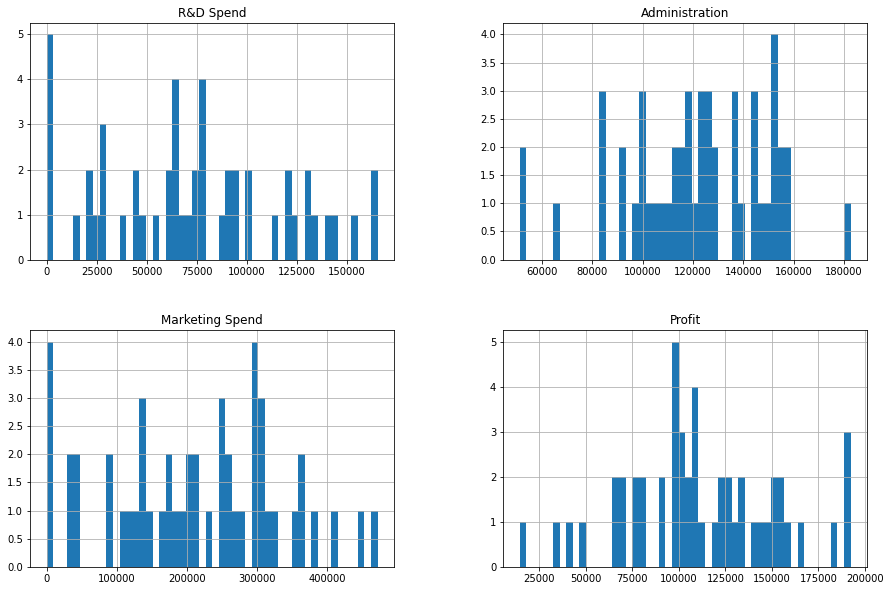

In [ ]:
startups_new.hist(bins=50,figsize=(15,10))
plt.show()


In [ ]:
startups.corr().style.background_gradient(cmap='BuGn')

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


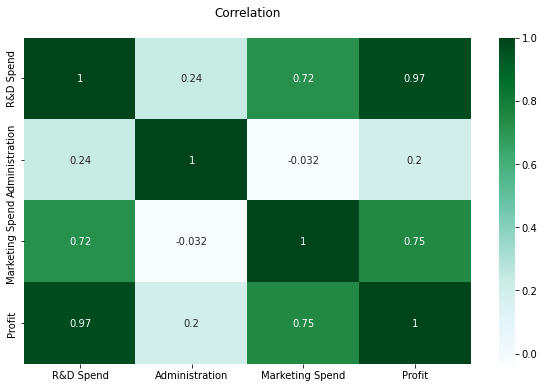

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(startups_new.corr(),annot=True,cmap='BuGn')
plt.title("Correlation\n")
plt.show()


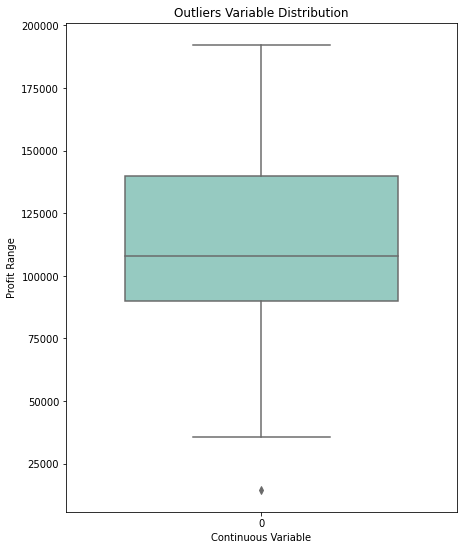

In [ ]:
plt.figure(figsize=(7,9))
sns.boxplot(data=startups_new['Profit'],orient="v", palette="Set3" , width=.7)
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
plt.show()

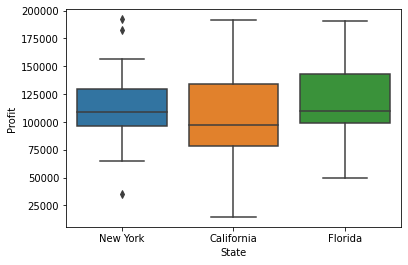

In [ ]:
sns.boxplot(x = 'State', y = 'Profit' , data =startups)
plt.show()

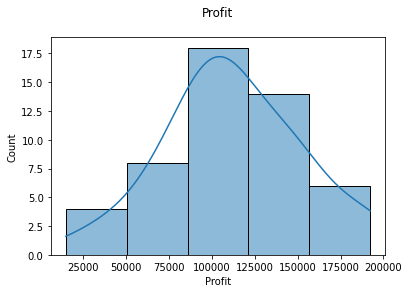

In [ ]:
sns.histplot(startups_new['Profit'],bins=5,kde=True)
plt.title("Profit\n")
plt.show()

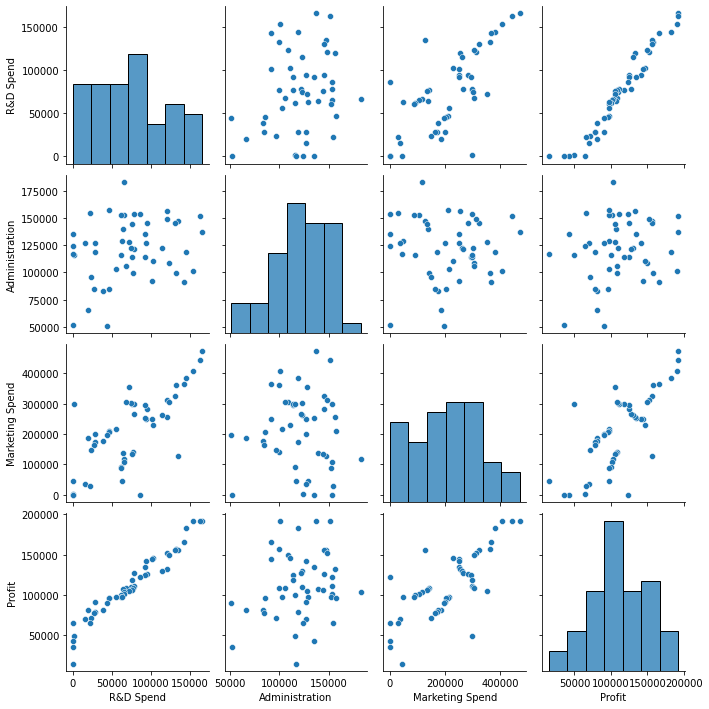

In [ ]:
sns.pairplot(startups_new)
plt.show()

## **STEP 1 : Now Creating Linear Regression Model**

In [ ]:
startups_new.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
x = startups_new.iloc[:,:3].values
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [ ]:
x.ndim

2

In [ ]:
y = startups_new.iloc[:,-1].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
y.ndim

1

In [ ]:
x.shape

(50, 3)

In [ ]:
y.shape

(50,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [ ]:
x_train.shape

(37, 3)

In [ ]:
x_test.shape

(13, 3)

In [ ]:
y_train.shape

(37,)

In [ ]:
y_test.shape

(13,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred 

array([104858.68792624, 132180.42376363, 133322.11933423,  72113.62933704,
       179083.55561998, 114843.75907009,  65955.16143209,  98683.96747911,
       114456.08522159, 168405.59509517,  96182.70251536,  87655.37645653,
       110908.05435256])

In [ ]:
model.score(x_test, y_test)

0.9325475204846337

In [ ]:
model.score(x_train, y_train)

0.9511460611707223

In [ ]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_test, y_pred)
print("R2 score of model is :" ,(r2Score*100))

R2 score of model is : 93.25475204846337


In [ ]:
model.predict([[165349.20, 136897.80	, 471784.10	]])  # Here this model is ready for implementation.

array([192104.00185557])

In [ ]:
df = pd.DataFrame(data={'Actual Output':y_test.flatten(),'Predicted Output':y_pred.flatten()})
df

,Actual Output,Predicted Output
0,103282.38,104858.687926
1,144259.40,132180.423764
2,146121.95,133322.119334
3,77798.83,72113.629337
4,191050.39,179083.555620
5,105008.31,114843.759070
6,81229.06,65955.161432
7,97483.56,98683.967479
8,110352.25,114456.085222
9,166187.94,168405.595095
